# Script for mitochondrial cluster-size analysis


In [ ]:
from PIL import Image, ImageOps, ImageEnhance, ImageFilter
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd
import seaborn as sns

In [ ]:
def SignalModeling(image, thres1, thres2, enhanced, n):
    kernel1 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (thres1,thres1))
    image1 = cv2.erode(image, kernel1)
    kernel2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (thres2,thres2))
    image2 = cv2.dilate(image1, kernel2)
    if 'Green' in enhanced:
        for row in range(image2.shape[0]):
            for col in range(image2.shape[1]):
              image2[row,col][1] = image2[row,col][1]*n
    if 'Red' in enhanced:
        for row in range(image2.shape[0]):
            for col in range(image2.shape[1]):
              image2[row,col][0] = image2[row,col][0]*n
    if 'Blue' in enhanced:
        for row in range(image2.shape[0]):
            for col in range(image2.shape[1]):
              image2[row,col][2] = image2[row,col][2]*n

    return image2

def MitoSignalModeling(image, enhanced):
    kernel1 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2,2))
    image1 = cv2.erode(image, kernel1)
    kernel2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2,2))
    image2 = cv2.dilate(image1, kernel2)
    if 'Green' in enhanced:
        for row in range(image2.shape[0]):
            for col in range(image2.shape[1]):
              if 255 >= image2[row,col][1] > 75:
                image2[row,col][1] = 200
              else:
                image2[row,col][1] = 0
    if 'Red' in enhanced:
        for row in range(image2.shape[0]):
            for col in range(image2.shape[1]):
              if 255 >= image2[row,col][0] > 75:
                image2[row,col][0] = 200
              else:
                image2[row,col][0] = 0

    return image2

def MiToSurfaceAnalyzer(imag, imag2, thres, Area, rowcut1, colcut1):
    if 'specific' in Area:
        image = imag[rowcut1 : rowcut1+500, colcut1 : colcut1+500]
        image2 = imag2[rowcut1 : rowcut1+500, colcut1 : colcut1+500]
        imagegray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    if 'All' in Area:
        image = imag
        image2 = imag2
        imagegray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    plt.figure(figsize = (8,8))
    plot1 = plt.imshow(image)

    #Establish the threshold
    Image = image
    Threshold, bi_image = cv2.threshold(imagegray, thres, 255, cv2.THRESH_BINARY)
    plt.figure(figsize = (8,8))
    plot2 = plt.imshow(bi_image, cmap = 'gray')

    #finding countors
    imagecanny, contours = cv2.findContours(image = bi_image, mode = cv2.RETR_EXTERNAL, method = cv2.CHAIN_APPROX_NONE)

    #Draw and count identified cells
    l1, l2, l3, l4, l5 = [],[],[],[],[]
    Small_mitochondria = 0
    Small_intermedia_mitochondria = 0
    Intermedia_mitochondria = 0
    Large_intermedia_mitochondria = 0
    Large_mitochondria = 0
    for cnt in imagecanny:
        #print(len(cnt))
        if 30 >= len(cnt) > 1:
            Small_mitochondria = Small_mitochondria + 1
            l1.append(cnt)
        if 60 >= len(cnt) > 30:
            Small_intermedia_mitochondria = Small_intermedia_mitochondria + 1
            l2.append(cnt)
        if 90 >= len(cnt) > 60:
            Intermedia_mitochondria = Intermedia_mitochondria + 1
            l3.append(cnt)
        if 120 >= len(cnt) > 90:
            Large_intermedia_mitochondria = Large_intermedia_mitochondria + 1
            l4.append(cnt)
        if  len(cnt) > 120:
            Large_mitochondria = Large_mitochondria + 1
            l5.append(cnt)

    #draw the countors found
    cv2.drawContours(image = Image, contours = l1, contourIdx = -1, color = (60,20,220), thickness = -1)
    cv2.drawContours(image = Image, contours = l2, contourIdx = -1, color = (250,101,240), thickness = -1)
    cv2.drawContours(image = Image, contours = l3, contourIdx = -1, color = (252,106,135), thickness = -1)
    cv2.drawContours(image = Image, contours = l4, contourIdx = -1, color = (252,156,106), thickness = -1)
    cv2.drawContours(image = Image, contours = l5, contourIdx = -1, color = (241,252,128), thickness = -1)

    MitoTotal = (Small_mitochondria + Small_intermedia_mitochondria + Intermedia_mitochondria + Large_intermedia_mitochondria + Large_mitochondria)

    plt.figure(figsize = (8,8))
    plot3 = plt.imshow(image)


    plt.figure(figsize = (8,8))
    plot4 = plt.imshow(image2)

    da = {'groups': ['Small', 'Small intermedia', 'Intermedia', 'Intermedia large', 'Large', 'Total mitochondria'],'Mitosurface' : [round(Small_mitochondria/MitoTotal*100,2), round(Small_intermedia_mitochondria/MitoTotal*100,2), round(Intermedia_mitochondria/MitoTotal*100,2), round(Large_intermedia_mitochondria/MitoTotal*100,2), round(Large_mitochondria/MitoTotal*100,2), round(MitoTotal,2)]}
    dataframe = pd.DataFrame(data = da)

    return dataframe

,groups,Mitosurface
0,Small,84.96
1,Small intermedia,6.78
2,Intermedia,4.42
3,Intermedia large,2.65
4,Large,1.18
5,Total mitochondria,339.00


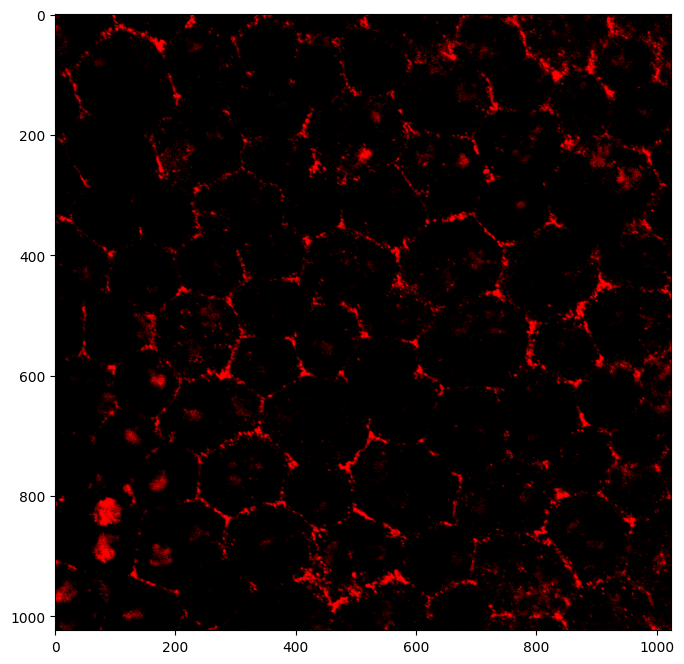

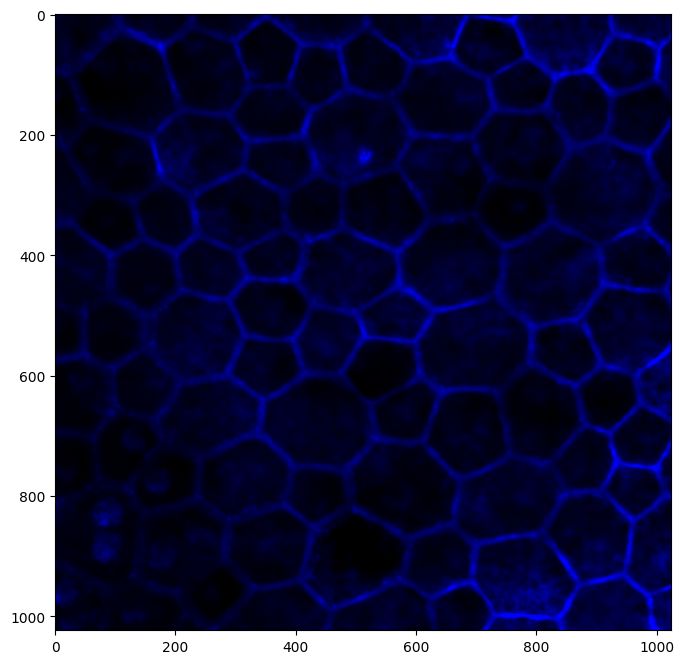

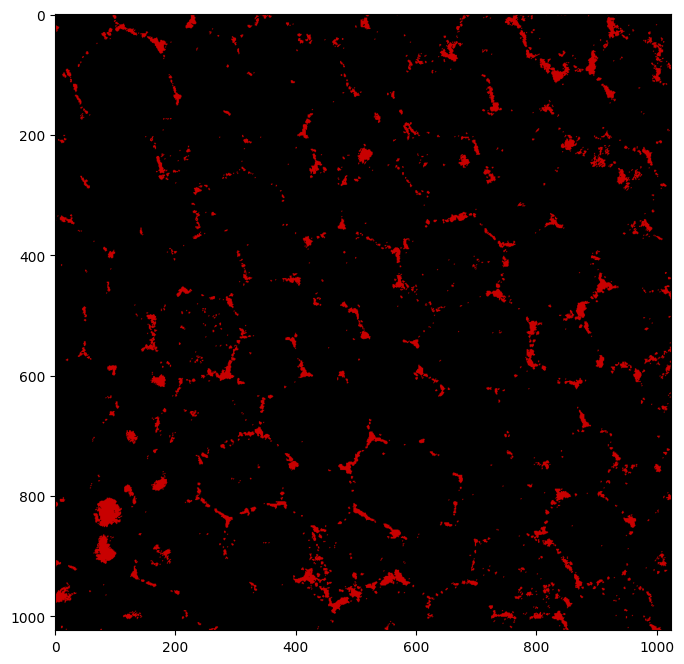

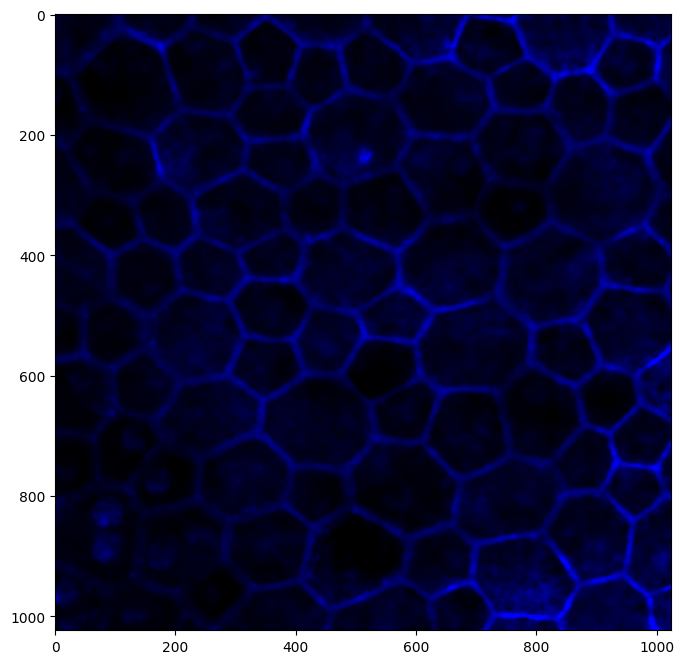

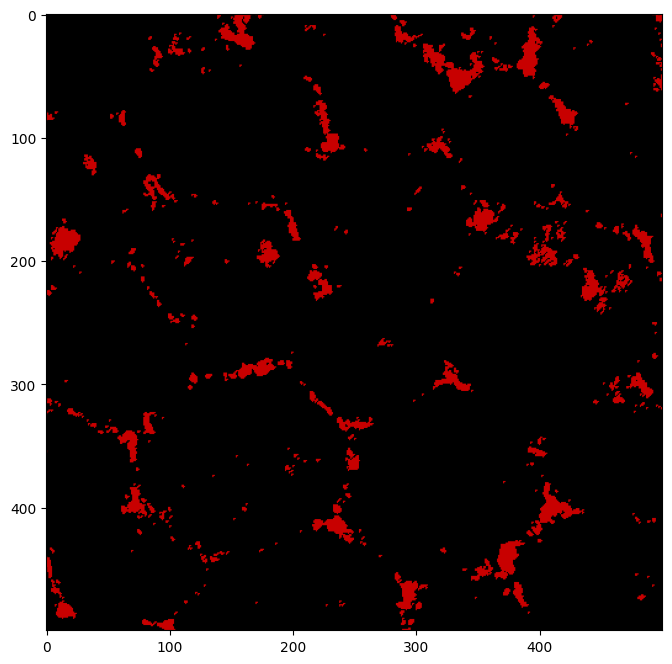

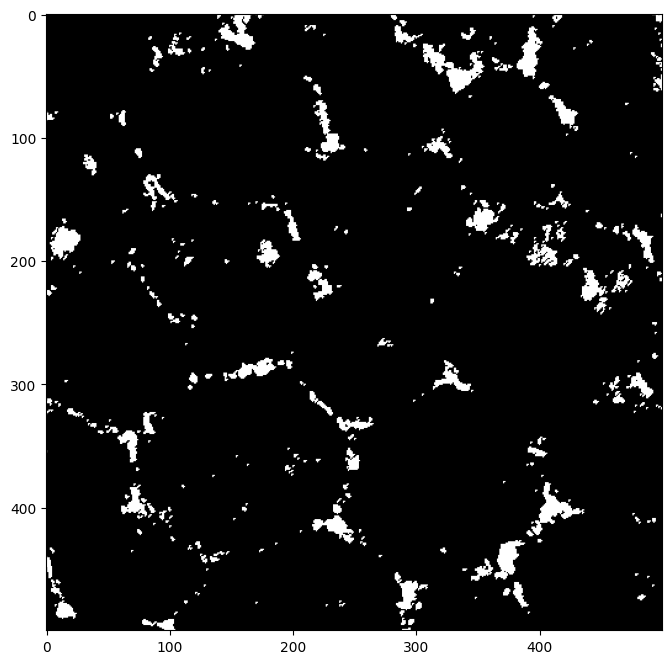

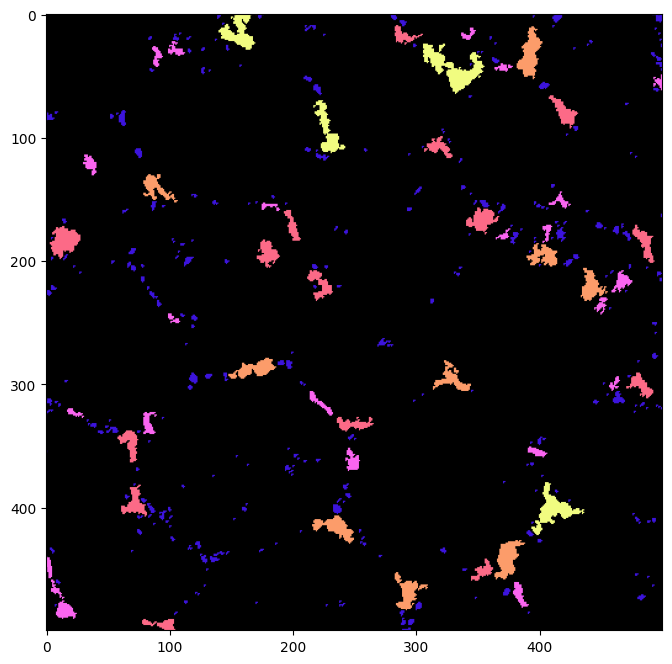

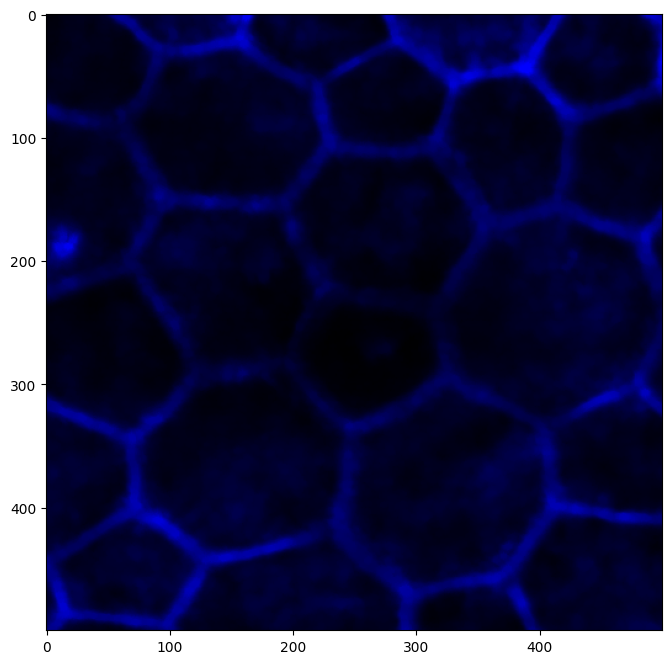

In [ ]:
#Open mitochondrial marker images
path = r'/content/drive/MyDrive/Python protocols/Imagenes/TOM20 surface analysis/TOM20/modificadas/R5 OD T.tif'
r5odtM = cv2.imread(path)

r5odtMRGB = cv2.cvtColor(r5odtM, cv2.COLOR_BGR2RGB)
plt.figure(figsize = (8,8))
plt.imshow(r5odtMRGB)

#Open phalloidin images
path = r'/content/drive/MyDrive/Python protocols/Imagenes/TOM20 surface analysis/phalloidin/modificadas/R5 OD T.tif'
r5odtP = cv2.imread(path)

r5odtPRGB = cv2.cvtColor(r5odtP, cv2.COLOR_BGR2RGB)
plt.figure(figsize = (8,8))
plt.imshow(r5odtPRGB)

#'SIGNALINGMODELING'
r5odtMRGBfil = MitoSignalModeling(r5odtMRGB, 'Red')
plt.figure(figsize = (8,8))
plt.imshow(r5odtMRGBfil)

r5odtPRGBfil = SignalModeling(r5odtPRGB, 5, 5, 'Blue', 1.0)
plt.figure(figsize = (8,8))
plt.imshow(r5odtPRGBfil)

#MITOSURFACE ANALYSIS
Mitodata = MiToSurfaceAnalyzer(r5odtMRGBfil, r5odtPRGBfil, 10, 'specific',50,500)
Mitodata

1

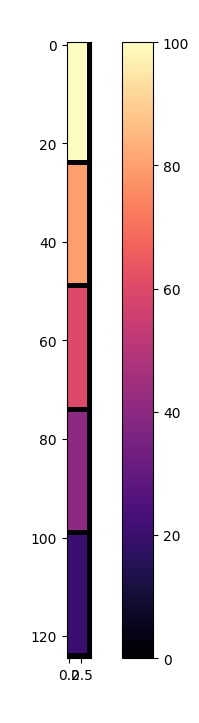

In [ ]:
#COLOUR BAR
vec_img = np.ones((125, 5), np.uint8)
vec_img[100:124,0:4] = vec_img[100:124,0:4]*20
vec_img[75:99,0:4] = vec_img[75:99,0:4]*40
vec_img[50:74,0:4] = vec_img[50:74,0:4]*60
vec_img[25:49,0:4] = vec_img[25:49,0:4]*80
vec_img[0:24,0:4] = vec_img[0:24,0:4]*100
fig = plt.figure(figsize = (8,8))
plt.text(-12,-5,'Large mitochondria', color = 'white')
#plt.text(-58,40,'Large intermedia mitochondria', color = 'white')
#plt.text(-50,65,'Intermedia mitochondria', color = 'white')
#plt.text(-58,90,'Small intermedia mitochondria', color = 'white')
plt.text(-12,135,'Smaller mitochondria', color = 'white')
plot = plt.imshow(vec_img, cmap = 'magma', vmin = 0, vmax = 100)
fig.colorbar(plot)
vec_img[24,0]